Aromatase: This enzyme converts androgens into estrogens, which can fuel the growth of breast cancer cells. <br>
<br>
Estrone Sulfatase (ES): This enzyme converts estrone sulfate (E1S) to estrone (E1), which can stimulate the growth of breast cancer cells.<br>

# Installing ChEMBL Webclient

In [1]:
!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Packages

In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

pd.set_option('display.max_columns', None)

# Retreiving Data from ChEMBL Database

In [3]:
# target search for estrone sulfatase

target = new_client.target
target_query = target.search('estrone sulfatase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P08842', 'xref_name': None, 'xre...",Homo sapiens,Steryl-sulfatase,36.0,False,CHEMBL3559,"[{'accession': 'P08842', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,N-acetylgalactosamine-6-sulfatase,20.0,False,CHEMBL4523218,"[{'accession': 'P34059', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'P15589', 'xref_name': None, 'xre...",Rattus norvegicus,Steryl-sulfatase,19.0,False,CHEMBL3531,"[{'accession': 'P15589', 'component_descriptio...",SINGLE PROTEIN,10116
3,"[{'xref_id': 'P49889', 'xref_name': None, 'xre...",Rattus norvegicus,Estrogen sulfotransferase 3,16.0,False,CHEMBL4831,"[{'accession': 'P49889', 'component_descriptio...",SINGLE PROTEIN,10116
4,"[{'xref_id': 'P15289', 'xref_name': None, 'xre...",Homo sapiens,Cerebroside-sulfatase,15.0,False,CHEMBL2193,"[{'accession': 'P15289', 'component_descriptio...",SINGLE PROTEIN,9606
5,"[{'xref_id': 'P15848', 'xref_name': None, 'xre...",Homo sapiens,N-acetylgalactosamine-4-sulfatase,15.0,False,CHEMBL2399,"[{'accession': 'P15848', 'component_descriptio...",SINGLE PROTEIN,9606
6,[],Homo sapiens,Arylsulfatase G,15.0,False,CHEMBL2189124,"[{'accession': 'Q96EG1', 'component_descriptio...",SINGLE PROTEIN,9606


In [4]:
selected_target1 = targets.target_chembl_id[0] #Steryl-sulfatase
selected_target2 = targets.target_chembl_id[1] #N-acetylgalactosamine-6-sulfatase
selected_target3 = targets.target_chembl_id[4] #Cerebroside-sulfatase
selected_target4 = targets.target_chembl_id[5] #N-acetylgalactosamine-4-sulfatase
selected_target5 = targets.target_chembl_id[6] #Arylsulfatase G

In [5]:
selected_target1, selected_target2, selected_target3, selected_target4, selected_target5

('CHEMBL3559', 'CHEMBL4523218', 'CHEMBL2193', 'CHEMBL2399', 'CHEMBL2189124')

In [6]:
#collecting data for each target, and then filtering out only the rows that has IC50 in the standard_type column
#and then storing them in dictionaries
activity = new_client.activity
res1 = activity.filter(target_chembl_id=selected_target1).filter(standard_type='IC50') 
res2 = activity.filter(target_chembl_id=selected_target2).filter(standard_type='IC50')
res3 = activity.filter(target_chembl_id=selected_target3).filter(standard_type='IC50')
res4 = activity.filter(target_chembl_id=selected_target4).filter(standard_type='IC50') 
res5 = activity.filter(target_chembl_id=selected_target5).filter(standard_type='IC50') 

In [7]:
#converting dictionaries to pandas dataframes
df1 = pd.DataFrame.from_dict(res1)
df2 = pd.DataFrame.from_dict(res2)
df3 = pd.DataFrame.from_dict(res3)
df4 = pd.DataFrame.from_dict(res4)
df5 = pd.DataFrame.from_dict(res5)

In [8]:
#concatenating all the dataframes on top of each other (by rows)
df = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)

In [9]:
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,34675,[],CHEMBL677753,In vitro inhibition of estrone sulfatase.,B,None,None,BAO_0000190,BAO_0000357,single protein format,NS(=O)(=O)Oc1ccc(Br)cc1,Outside typical range,Values for this activity type are unusually la...,CHEMBL1135300,Bioorg. Med. Chem. Lett.,2002,None,CHEMBL283121,None,CHEMBL283121,None,0,http://www.openphacts.org/units/Nanomolar,32568,=,1,1,=,None,IC50,nM,None,912000.0,CHEMBL3559,Homo sapiens,Steryl-sulfatase,9606,None,None,IC50,uM l-1,UO_0000065,None,912.0
1,None,35922,[],CHEMBL677753,In vitro inhibition of estrone sulfatase.,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cccc(OS(N)(=O)=O)c1,Outside typical range,Values for this activity type are unusually la...,CHEMBL1135300,Bioorg. Med. Chem. Lett.,2002,None,CHEMBL287279,None,CHEMBL287279,None,0,http://www.openphacts.org/units/Nanomolar,32573,=,1,1,=,None,IC50,nM,None,2089000.0,CHEMBL3559,Homo sapiens,Steryl-sulfatase,9606,None,None,IC50,uM l-1,UO_0000065,None,2089.0
2,Not Determined,37113,[],CHEMBL677754,In vitro inhibition of estrone sulfatase; Not ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCCCCCCOS(N)(=O)=O,None,None,CHEMBL1135300,Bioorg. Med. Chem. Lett.,2002,None,CHEMBL430306,SULFAMIC ACID HEPTYL ESTER,CHEMBL430306,None,0,http://www.openphacts.org/units/Nanomolar,32586,None,1,0,None,None,IC50,nM,None,None,CHEMBL3559,Homo sapiens,Steryl-sulfatase,9606,None,None,IC50,uM l-1,UO_0000065,None,None
3,None,37115,[],CHEMBL677753,In vitro inhibition of estrone sulfatase.,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@]12CC[C@@H]3c4ccc(OS(N)(=O)=O)cc4CC[C@H]3[...,None,None,CHEMBL1135300,Bioorg. Med. Chem. Lett.,2002,"{'bei': '18.03', 'le': '0.36', 'lle': '3.61', ...",CHEMBL122708,EMATE,CHEMBL122708,6.30,1,http://www.openphacts.org/units/Nanomolar,32576,=,1,1,=,None,IC50,nM,None,500.0,CHEMBL3559,Homo sapiens,Steryl-sulfatase,9606,None,None,IC50,uM l-1,UO_0000065,None,0.5
4,Not Determined,38370,[],CHEMBL677754,In vitro inhibition of estrone sulfatase; Not ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCCCCCCCCOS(C)(=O)=O,None,None,CHEMBL1135300,Bioorg. Med. Chem. Lett.,2002,None,CHEMBL24332,METHANESULFONIC ACID NONYL ESTER,CHEMBL24332,None,0,http://www.openphacts.org/units/Nanomolar,32584,None,1,0,None,None,IC50,nM,None,None,CHEMBL3559,Homo sapiens,Steryl-sulfatase,9606,None,None,IC50,uM l-1,UO_0000065,None,None


In [10]:
df.shape

(867, 45)

# Preprocessing and Feature Engineering

In [11]:
#selecting only required columns
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df= df[selection]
df.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL283121,NS(=O)(=O)Oc1ccc(Br)cc1,912000.0
1,CHEMBL287279,Cc1cccc(OS(N)(=O)=O)c1,2089000.0
2,CHEMBL430306,CCCCCCCOS(N)(=O)=O,None
3,CHEMBL122708,C[C@]12CC[C@@H]3c4ccc(OS(N)(=O)=O)cc4CC[C@H]3[...,500.0
4,CHEMBL24332,CCCCCCCCCOS(C)(=O)=O,None


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  867 non-null    object
 1   canonical_smiles    867 non-null    object
 2   standard_value      840 non-null    object
dtypes: object(3)
memory usage: 20.4+ KB


In [13]:
# convert the standard_value column to numeric
df['standard_value'] = pd.to_numeric(df['standard_value'])

<ipython-input-13-4c6540fd3172>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['standard_value'] = pd.to_numeric(df['standard_value'])


In [14]:
#checking for null datapoints
df.isna().sum()

molecule_chembl_id     0
canonical_smiles       0
standard_value        27
dtype: int64

In [15]:
#filtering only non-null data
df = df[df.standard_value.notna()]

#confirming non-null data
df.isna().sum()

molecule_chembl_id    0
canonical_smiles      0
standard_value        0
dtype: int64

## Labeling compounds as either being active, inactive or intermediate
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [16]:
bioactivity_threshold = []

for i in df.standard_value:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")

In [17]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
bioactivity_class.count()

840

In [18]:
df.reset_index(inplace = True)

In [19]:
df.pop('index')
df.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL283121,NS(=O)(=O)Oc1ccc(Br)cc1,912000.0
1,CHEMBL287279,Cc1cccc(OS(N)(=O)=O)c1,2089000.0
2,CHEMBL122708,C[C@]12CC[C@@H]3c4ccc(OS(N)(=O)=O)cc4CC[C@H]3[...,500.0
3,CHEMBL23350,NS(=O)(=O)Oc1ccc(Cl)cc1,1585000.0
4,CHEMBL24063,NS(=O)(=O)Oc1cccc(I)c1,120000.0


In [20]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df = pd.concat([df, bioactivity_class], axis=1)
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL283121,NS(=O)(=O)Oc1ccc(Br)cc1,912000.0,inactive
1,CHEMBL287279,Cc1cccc(OS(N)(=O)=O)c1,2089000.0,inactive
2,CHEMBL122708,C[C@]12CC[C@@H]3c4ccc(OS(N)(=O)=O)cc4CC[C@H]3[...,500.0,active
3,CHEMBL23350,NS(=O)(=O)Oc1ccc(Cl)cc1,1585000.0,inactive
4,CHEMBL24063,NS(=O)(=O)Oc1cccc(I)c1,120000.0,inactive


# Graphs and Visualizations

In [21]:
df_temp=df.copy()

In [22]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
# this is just an extra step, you can visualize the structure of each molecule using rdkit
from rdkit.Chem import PandasTools
%matplotlib inline

PandasTools.AddMoleculeColumnToFrame(df_temp,'canonical_smiles','molecules')
#df.molecules[0]

,molecule_chembl_id,canonical_smiles,standard_value,class,molecules
0,CHEMBL283121,NS(=O)(=O)Oc1ccc(Br)cc1,912000.00,inactive,
1,CHEMBL287279,Cc1cccc(OS(N)(=O)=O)c1,2089000.00,inactive,
2,CHEMBL122708,C[C@]12CC[C@@H]3c4ccc(OS(N)(=O)=O)cc4CC[C@H]3[...,500.00,active,
3,CHEMBL23350,NS(=O)(=O)Oc1ccc(Cl)cc1,1585000.00,inactive,
4,CHEMBL24063,NS(=O)(=O)Oc1cccc(I)c1,120000.00,inactive,
...,...,...,...,...,...
835,CHEMBL4639657,CN(C)c1cccc2c(S(=O)(=O)NC[C@]3(O)CC[C@H]4[C@@H...,2.10,active,
836,CHEMBL518966,CC(C)(C)c1ccc(C[C@]2(O)CC[C@H]3[C@@H]4CCc5cc(O...,28.00,active,
837,CHEMBL122708,C[C@]12CC[C@@H]3c4ccc(OS(N)(=O)=O)cc4CC[C@H]3[...,7600.00,intermediate,
838,CHEMBL4643348,COc1cc2c(cc1OS(N)(=O)=O)CC[C@@H]1[C@@H]2CCC2(C...,0.04,active,

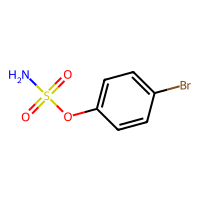
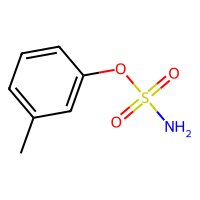
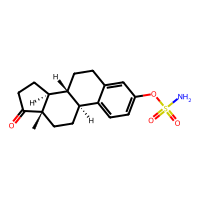
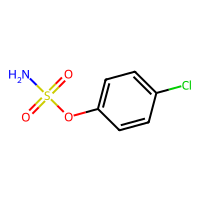
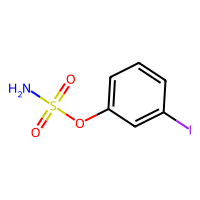
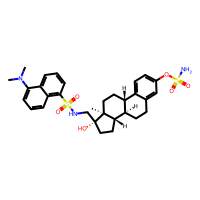
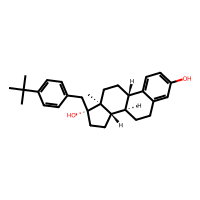
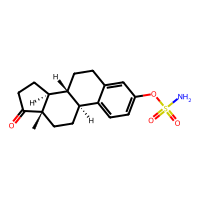
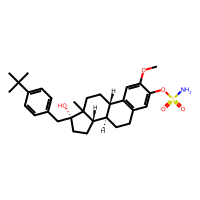
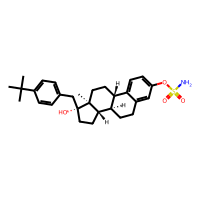

In [24]:
df_temp

In [25]:
import plotly.express as px


# Group the data by the 'class' column and count the number of occurrences of each category
grouped_data = df.groupby("class").size().reset_index(name="count")

# Create a bar chart using the grouped data
fig = px.bar(grouped_data, x='class', y='count')
fig.show()

# Converting IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50) <br>
<br>
The log10 is commonly used when we are working with really large or really small numbers that are difficult to read in their raw form. In such cases, we take the log10 of the number and get a smaller number that can be more easily interpreted. 

In [26]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [27]:
-np.log10( (10**-9)* 100000000 )

1.0

In [28]:
-np.log10( (10**-9)* 10000000000)

-1.0

To handle the issue of negative numbers generated by -log10 function, we'll make custom function which takes the IC50 (standard_value) as input and this function will set every value that's greater than 100000000 equal to 100000000.

In [29]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [30]:
df_norm = norm_value(df)

<ipython-input-29-5129d3ad53d7>:10: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [31]:
df_norm[df_norm['standard_value_norm']>100000000] #confirming that there are no rows containing value greater than 100000000

,molecule_chembl_id,canonical_smiles,class,standard_value_norm


Now that we've taken care of the numbers range, we can call the pIC50 function which will convert IC50 values to -log10(IC50) 

In [32]:
df_converted = pIC50(df_norm)
df_converted

<ipython-input-26-bf09df1ccbf9>:13: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,molecule_chembl_id,canonical_smiles,class,pIC50
0,CHEMBL283121,NS(=O)(=O)Oc1ccc(Br)cc1,inactive,3.040005
1,CHEMBL287279,Cc1cccc(OS(N)(=O)=O)c1,inactive,2.680062
2,CHEMBL122708,C[C@]12CC[C@@H]3c4ccc(OS(N)(=O)=O)cc4CC[C@H]3[...,active,6.301030
3,CHEMBL23350,NS(=O)(=O)Oc1ccc(Cl)cc1,inactive,2.799971
4,CHEMBL24063,NS(=O)(=O)Oc1cccc(I)c1,inactive,3.920819
...,...,...,...,...
835,CHEMBL4639657,CN(C)c1cccc2c(S(=O)(=O)NC[C@]3(O)CC[C@H]4[C@@H...,active,8.677781
836,CHEMBL518966,CC(C)(C)c1ccc(C[C@]2(O)CC[C@H]3[C@@H]4CCc5cc(O...,active,7.552842
837,CHEMBL122708,C[C@]12CC[C@@H]3c4ccc(OS(N)(=O)=O)cc4CC[C@H]3[...,intermediate,5.119186
838,CHEMBL4643348,COc1cc2c(cc1OS(N)(=O)=O)CC[C@@H]1[C@@H]2CCC2(C...,active,10.397940


## Comparison before and after converting IC50 to PIC50

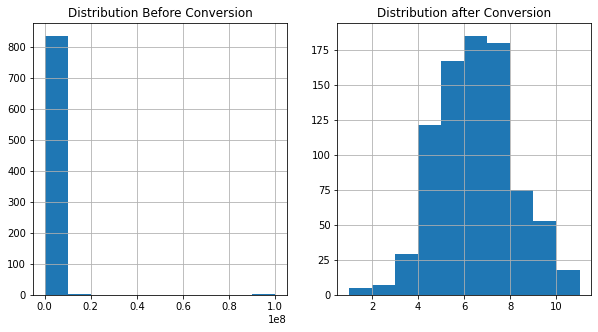

In [33]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

df['standard_value'].hist(ax=ax[0])
ax[0].set_title('Distribution Before Conversion')

df_converted['pIC50'].hist(ax=ax[1])
ax[1].set_title('Distribution after Conversion')

plt.show()

# Download PaDEL Descriptor
PaDEL Descriptor is a software tool for the calculation of molecular descriptors, which are numerical values that can be used to characterize the properties of a molecule. These descriptors can be used in a variety of applications, including virtual screening, quantitative structure-activity relationships (QSAR) and drug design. 

In [34]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-01-12 11:21:49--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-01-12 11:21:50--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2023-01-12 11:21:50 (204 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-01-12 11:21:50--  https://github

In [37]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [38]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_converted[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [39]:
! cat molecule.smi | head -5

NS(=O)(=O)Oc1ccc(Br)cc1	CHEMBL283121
Cc1cccc(OS(N)(=O)=O)c1	CHEMBL287279
C[C@]12CC[C@@H]3c4ccc(OS(N)(=O)=O)cc4CC[C@H]3[C@@H]1CCC2=O	CHEMBL122708
NS(=O)(=O)Oc1ccc(Cl)cc1	CHEMBL23350
NS(=O)(=O)Oc1cccc(I)c1	CHEMBL24063


In [40]:
! cat molecule.smi | wc -l

840


# Calculate PaDEL Descriptors

In [41]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [42]:
! bash padel.sh

Processing CHEMBL283121 in molecule.smi (1/840). 
Processing CHEMBL287279 in molecule.smi (2/840). 
Processing CHEMBL122708 in molecule.smi (3/840). Average speed: 2.02 s/mol.
Processing CHEMBL23350 in molecule.smi (4/840). Average speed: 1.03 s/mol.
Processing CHEMBL24063 in molecule.smi (5/840). Average speed: 0.80 s/mol.
Processing CHEMBL11185 in molecule.smi (6/840). Average speed: 0.65 s/mol.
Processing CHEMBL24210 in molecule.smi (7/840). Average speed: 0.62 s/mol.
Processing CHEMBL282717 in molecule.smi (8/840). Average speed: 0.57 s/mol.
Processing CHEMBL23067 in molecule.smi (9/840). Average speed: 0.53 s/mol.
Processing CHEMBL24259 in molecule.smi (10/840). Average speed: 0.54 s/mol.
Processing CHEMBL24119 in molecule.smi (11/840). Average speed: 0.45 s/mol.
Processing CHEMBL283560 in molecule.smi (12/840). Average speed: 0.44 s/mol.
Processing CHEMBL23864 in molecule.smi (13/840). Average speed: 0.43 s/mol.
Processing CHEMBL23258 in molecule.smi (15/840). Average speed: 0.42

# Preparing Data for Modeling

In [44]:
#independent variables/columns
df_X = pd.read_csv('descriptors_output.csv')
df_X.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,PubchemFP

In [45]:
#dependent variable
df_Y = df_converted['pIC50']
df_Y.head()

0    3.040005
1    2.680062
2    6.301030
3    2.799971
4    3.920819
Name: pIC50, dtype: float64

In [46]:
df_X.shape, df_Y.shape

((840, 882), (840,))

## Combining X and Y

In [53]:
df_final = pd.concat([df_X,df_Y], axis=1)
df_final

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,PubchemFP

In [54]:
#removing Name column
df_final = df_final.drop(columns=['Name'])
df_final.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,PubchemFP315,P

## Input and Output Features

In [55]:
#output feautures
Y = df_final.pop("pIC50")
Y

0       3.040005
1       2.680062
2       6.301030
3       2.799971
4       3.920819
         ...    
835     8.677781
836     7.552842
837     5.119186
838    10.397940
839    10.522879
Name: pIC50, Length: 840, dtype: float64

In [56]:
#input features
X = df_final
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,PubchemFP315,P

## Remove low variance features

In [57]:
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

## Train-Test Split

In [58]:
from sklearn.model_selection import train_test_split

#90/10 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

# Model Implementation- Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
result

0.284882169540974

In [60]:
Y_pred = model.predict(X_test)

## Scatter Plot of Experimental vs Predicted pIC50 Values

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show(*args, **kw)>

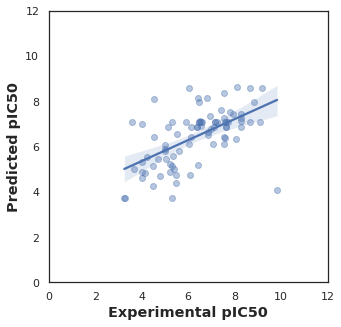

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Comapring performance of Regressors

## Install Lazypredict package

In [62]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Build Lazy Regressor

In [63]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

# Defines and builds the lazy regressor
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 93%|█████████▎| 39/42 [00:21<00:01,  1.67it/s]

[12:09:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:22<00:00,  1.88it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 93%|█████████▎| 39/42 [00:23<00:02,  1.46it/s]

[12:09:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:24<00:00,  1.74it/s]


## Performance Comparison of all Regressors

In [64]:
# Performance table of the training set (90% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.61,0.66,0.99,0.27
ExtraTreeRegressor,0.61,0.66,0.99,0.06
DecisionTreeRegressor,0.61,0.66,0.99,0.04
ExtraTreesRegressor,0.61,0.66,0.99,0.70
RandomForestRegressor,0.59,0.64,1.01,0.81
BaggingRegressor,0.58,0.63,1.03,0.13
MLPRegressor,0.56,0.61,1.05,1.38
LGBMRegressor,0.55,0.61,1.06,0.20
HistGradientBoostingRegressor,0.55,0.61,1.06,0.80


[(0.0, 10.0)]

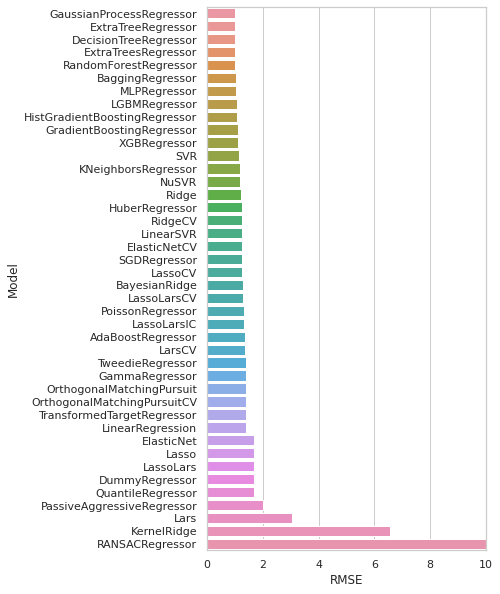

In [66]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

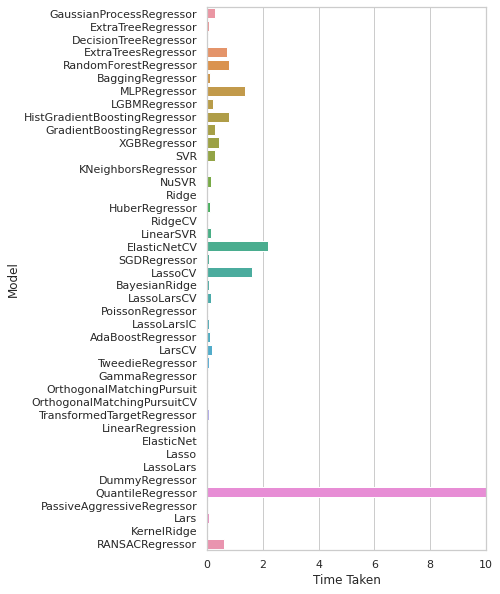

In [67]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))